In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
missing_values

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

In [7]:
duplicates = df.duplicated().sum()
duplicates

0

In [8]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

In [10]:
for col in num_cols:
    median = df[col].median()
    df[col].fillna(median, inplace=True)   

In [11]:
for col in cat_cols:
    mode = df[col].mode()[0]
    df[col].fillna(mode, inplace=True)

In [12]:
for col in ['SalePrice', 'GrLivArea', 'TotalBsmtSF']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]

In [13]:
df['HouseAge'] = df['YrSold'] - df['YearBuilt']
df['TotalArea'] = df['GrLivArea'] + df['TotalBsmtSF']

In [14]:
target = df['SalePrice']
df = df.drop(['SalePrice'], axis=1)

In [17]:
df = pd.get_dummies(df, drop_first=True)
df['SalePrice'] = target

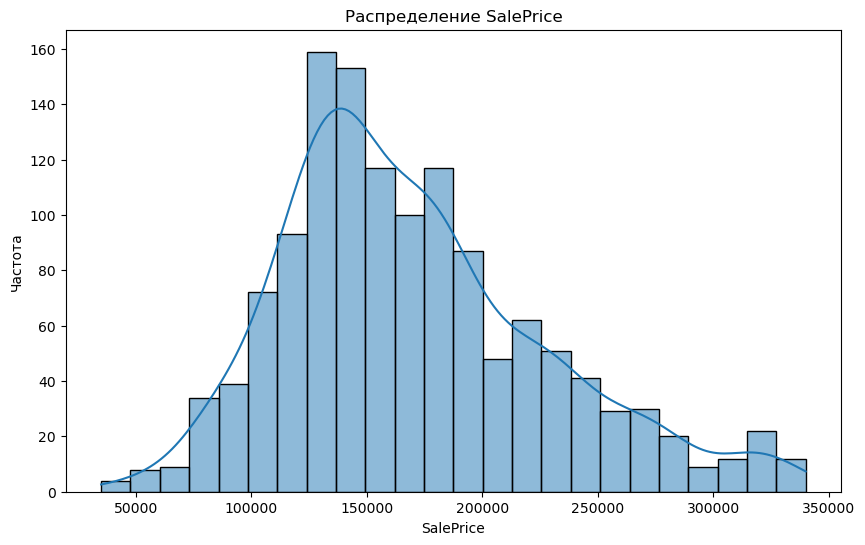

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True)
plt.title("Распределение SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Частота")
plt.show()

In [ ]:
df.to_csv('cleaned_house_prices.csv', index=False)

In [ ]:
df_cleaned_house_prices = pd.read_csv('cleaned_house_prices.csv')
df_cleaned_house_prices


# Загрузил в монгоДБ    (файл hw8_mongo.png)